In [19]:
import os

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#Directory containing images you wish to convert
input_dir = 'C:/Users/Martin/Untitled Folder 1/Raw_images/'

directories = os.listdir(input_dir)



Shirts
1


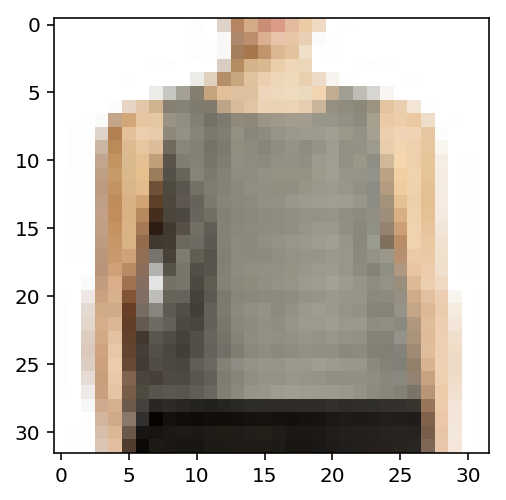

In [52]:

index = 0
index2 = 0
basewidth = 32

#wpercent = (basewidth / float(img.size[0]))
hsize = 32#int((float(img.size[1]) * float(wpercent)))

for folder in directories:
	#Ignoring .DS_Store dir
	if folder == '.DS_Store':
		pass

	else:
		print(folder)

		folder2 = os.listdir(input_dir + '/' + folder)
		index += 1

		for image in folder2:
			if image == ".DS_Store":
				pass

			else:
				index2 += 1

				im = Image.open(input_dir+"/"+folder+"/"+image) #Opening image
				im = im.resize((basewidth, hsize), Image.ANTIALIAS)
				im = (np.array(im)) #Converting to numpy array
				plt.imshow(im)                
				try:
					r = im[:,:,0] #Slicing to get R data
					g = im[:,:,1] #Slicing to get G data
					b = im[:,:,2] #Slicing to get B data

					if index2 != 1:
						new_array = np.array([[r] + [g] + [b]], np.uint8) #Creating array with shape (3, 100, 100)
						out = np.append(out, new_array, 0) #Adding new image to array shape of (x, 3, 100, 100) where x is image number

					elif index2 == 1:
						out = np.array([[r] + [g] + [b]], np.uint8) #Creating array with shape (3, 100, 100)

					if index == 1 and index2 == 1:
						index_array = np.array([[index]])

					else:
						new_index_array = np.array([[index]], np.int8)
						index_array = np.append(index_array, new_index_array, 0)

				except Exception as e:
					print(e)
					print( "Removing image" + image)
					os.remove(input_dir+"/"+folder+"/"+image)

print(index)

np.save('X_train.npy', out) #Saving train image arrays
np.save('Y_train.npy', index_array) #Saving train labels



In [49]:
len(out)

100

In [59]:
#erstes anzeigen
np.shape(out)

(100, 3, 32, 32)

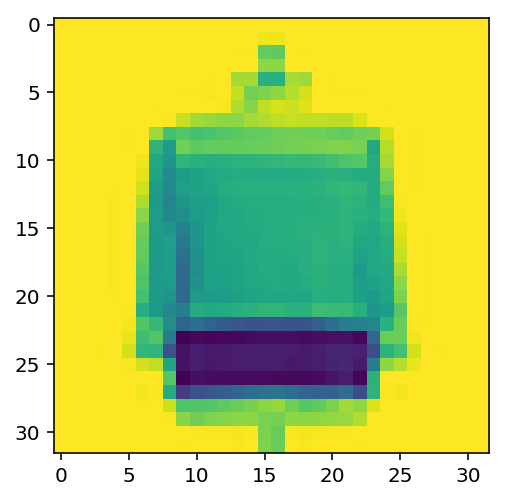

In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.imshow(out[0,0])

In [44]:
basewidth = 32
img = Image.open(input_dir + '/' + 'Shirts/' + '1050.jpg')
#wpercent = (basewidth / float(img.size[0]))
hsize = 32#int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)


In [56]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
cifar10_dataset_folder_path = 'cifar-10-batches-py'

In [58]:
with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')

features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels = batch['labels']

NameError: name 'batch_id' is not defined

In [2]:
#load images with url
import pandas as pd

witt_url = pd.read_csv('C:/Users/Martin/Downloads/wittweidende_bilder-feedmartinde.csv', sep='|')

In [65]:
witt_url.head()

,Artikel_ID,Bilder 1,Bilder 2,Bilder 3,Bilder 4,Artnr6
0,http://click.cptrack.de/?rd=true&k=YXOl0QS1rzv...,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,NaN,100009
1,http://click.cptrack.de/?rd=true&k=K-CDhOLhsZq...,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,NaN,100009
2,http://click.cptrack.de/?rd=true&k=a3XxikQQalI...,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,NaN,100009
3,http://click.cptrack.de/?rd=true&k=gw4zboV0IOh...,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,NaN,100009
4,http://click.cptrack.de/?rd=true&k=k3wgYCh-qtp...,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,http://www.witt-weiden.de/images/shop/003/003....,NaN,100009


In [43]:
grouped_df = witt_url.groupby('Artnr6')[ 'Bilder 1', 'Bilder 2'].first().reset_index()

In [44]:
list(grouped_df)
#group_obj.groups.keys()

['Artnr6', 'Bilder 1', 'Bilder 2']

In [45]:
import os
import urllib.request

for i in range(1000):
    fullfilename = os.path.join('C:/Users/Martin/Untitled Folder 1/Raw_images', str(grouped_df['Artnr6'][i])+'.jpg')
    urllib.request.urlretrieve(grouped_df['Bilder 1'][i], fullfilename)



#image = urllib.URLopener()
#urllib.urlopen('http://www.gunnerkrigg.com//comics/00000001.jpg')
#image.urlretrieve(witt_url['Bilder 1'][1], "00000001.jpg")

In [90]:
str(witt_url['Artnr6'][1])+'.jpg'


'100009.jpg'

In [9]:
fullfilename

'../Raw_images/100009.jpg'